# Setup

In [5]:
import os
import sys
from pathlib import Path

# Add source directory to system path
source_dir = str(Path(os.getcwd()).parent / 'src')
sys.path.append(source_dir)

# Dataset

10
Data(x=[75, 3], edge_index=[2, 5550], y=[1], pos=[75, 2])
Label: 5


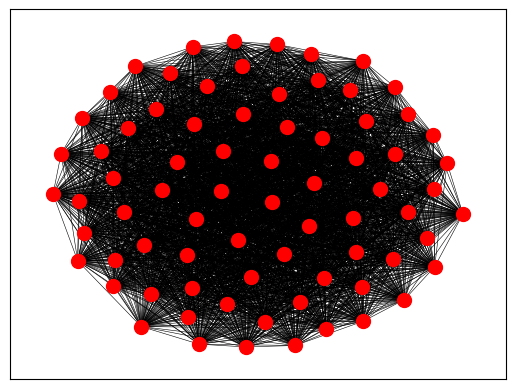

In [6]:

import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pathlib import Path
from torch_geometric.utils import to_networkx
from data import CIFAR10Superpixels


root = str(Path(os.getcwd()).parent / 'data' / 'cifar10-superpixels')
trainset = CIFAR10Superpixels(root=root)
testset = CIFAR10Superpixels(root=root, train=False)
sample = trainset[int(np.random.sample()*len(trainset))]
print(trainset.num_classes)
print(sample)
print("Label: {}".format(sample.y[0].cpu().numpy()))
G = to_networkx(sample, to_undirected=True)
nx.draw_networkx(G, with_labels=False, node_size=100, node_color="red", width=0.4)

# Model (GCN)

In [7]:
# Initialize Model and Optimizer
import torch
from models import GNN

hiddenSize = 128
numLayers = 4
convLayerType = 'gcn'
dropout = 0.2

model = GNN(trainset.num_features, hiddenSize, trainset.num_classes, numLayers=numLayers, convLayerType=convLayerType, dropout=dropout)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
print("Number of Model Parameters: {}".format(sum(p.numel() for p in model.parameters())))
print(model)

Number of Model Parameters: 68874
GNN(
  (convs): ModuleList(
    (0): GCN(3, 128)
    (1): GCN(128, 128)
    (2): GCN(128, 128)
    (3): GCN(128, 128)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (postMP): Sequential(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
  (logSoftmax): LogSoftmax(dim=1)
)


# Training

In [8]:
from pipeline import Trainer
trainer = Trainer(str(Path(os.getcwd()).parent), 'gcn_cifar', model, optimizer, replace=True)
trainer.train(trainset)

Loading Model Checkpoints at: /home/chankyo/Documents/stanford/cs224w/cs224w-final-project/model/gcn_cifar
Number of Saved Checkpoints Found: 0


100%|██████████| 665/665 [00:09<00:00, 67.12it/s]


Epoch 0 | Training Loss: 3.51423 | Train Acc.: 0.1874 | Valid Acc.: 0.2155


100%|██████████| 665/665 [00:08<00:00, 79.93it/s]


Epoch 1 | Training Loss: 2.18312 | Train Acc.: 0.2013 | Valid Acc.: 0.2232


100%|██████████| 665/665 [00:08<00:00, 80.08it/s]


Epoch 2 | Training Loss: 2.12836 | Train Acc.: 0.2057 | Valid Acc.: 0.2089


100%|██████████| 665/665 [00:08<00:00, 77.59it/s]


Epoch 3 | Training Loss: 2.12373 | Train Acc.: 0.2100 | Valid Acc.: 0.1896


100%|██████████| 665/665 [00:08<00:00, 76.61it/s]


Epoch 4 | Training Loss: 2.12497 | Train Acc.: 0.2104 | Valid Acc.: 0.2095


100%|██████████| 665/665 [00:08<00:00, 79.57it/s]


Epoch 5 | Training Loss: 2.13136 | Train Acc.: 0.2114 | Valid Acc.: 0.2193


100%|██████████| 665/665 [00:08<00:00, 79.65it/s]


Epoch 6 | Training Loss: 2.12388 | Train Acc.: 0.2123 | Valid Acc.: 0.1748


100%|██████████| 665/665 [00:08<00:00, 79.00it/s]


Epoch 7 | Training Loss: 2.12878 | Train Acc.: 0.2089 | Valid Acc.: 0.1812


100%|██████████| 665/665 [00:08<00:00, 79.68it/s]


Epoch 8 | Training Loss: 2.13893 | Train Acc.: 0.2110 | Valid Acc.: 0.1416


100%|██████████| 665/665 [00:08<00:00, 82.30it/s]


Epoch 9 | Training Loss: 2.12107 | Train Acc.: 0.2115 | Valid Acc.: 0.1057


100%|██████████| 665/665 [00:08<00:00, 82.40it/s]


Epoch 10 | Training Loss: 2.14475 | Train Acc.: 0.2060 | Valid Acc.: 0.2116


100%|██████████| 665/665 [00:08<00:00, 81.40it/s]


Epoch 11 | Training Loss: 2.14004 | Train Acc.: 0.2061 | Valid Acc.: 0.1845


100%|██████████| 665/665 [00:08<00:00, 82.10it/s]


Epoch 12 | Training Loss: 2.15574 | Train Acc.: 0.2033 | Valid Acc.: 0.1668


100%|██████████| 665/665 [00:08<00:00, 79.34it/s]


KeyboardInterrupt: 

In [ ]:
from pipeline import Trainer
trainer = Trainer(str(Path(os.getcwd()).parent), 'gcn_cifar', model, optimizer, replace=False)
trainer.test(testset)

# Model (GraphSAGE)

In [9]:
# Initialize Model and Optimizer
import torch
from models import GNN

hiddenSize = 256
numLayers = 2
convLayerType = 'sage'
dropout = 0.2

model = GNN(trainset.num_features, hiddenSize, trainset.num_classes, numLayers=numLayers, convLayerType=convLayerType, dropout=dropout)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
print("Number of Model Parameters: {}".format(sum(p.numel() for p in model.parameters())))
print(model)

Number of Model Parameters: 203018
GNN(
  (convs): ModuleList(
    (0): GraphSage(3, 256)
    (1): GraphSage(256, 256)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (postMP): Sequential(
    (0): Linear(in_features=256, out_features=256, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): Linear(in_features=256, out_features=10, bias=True)
  )
  (logSoftmax): LogSoftmax(dim=1)
)


# Training

In [10]:
from pipeline import Trainer
trainer = Trainer(str(Path(os.getcwd()).parent), 'graphsage_cifar', model, optimizer, replace=True)
trainer.train(trainset)

Loading Model Checkpoints at: /home/chankyo/Documents/stanford/cs224w/cs224w-final-project/model/graphsage_cifar
Number of Saved Checkpoints Found: 0


100%|██████████| 665/665 [00:16<00:00, 40.67it/s]


Epoch 0 | Training Loss: 8.23207 | Train Acc.: 0.2429 | Valid Acc.: 0.2339


100%|██████████| 665/665 [00:14<00:00, 46.51it/s]


Epoch 1 | Training Loss: 1.96085 | Train Acc.: 0.2876 | Valid Acc.: 0.2755


100%|██████████| 665/665 [00:14<00:00, 46.22it/s]


Epoch 2 | Training Loss: 1.89080 | Train Acc.: 0.3123 | Valid Acc.: 0.3185


100%|██████████| 665/665 [00:14<00:00, 45.97it/s]


Epoch 3 | Training Loss: 1.84360 | Train Acc.: 0.3312 | Valid Acc.: 0.3005


100%|██████████| 665/665 [00:14<00:00, 46.38it/s]


Epoch 4 | Training Loss: 1.83315 | Train Acc.: 0.3353 | Valid Acc.: 0.3144


100%|██████████| 665/665 [00:14<00:00, 46.09it/s]


Epoch 5 | Training Loss: 1.81344 | Train Acc.: 0.3437 | Valid Acc.: 0.2560


100%|██████████| 665/665 [00:14<00:00, 47.49it/s]


Epoch 6 | Training Loss: 1.82533 | Train Acc.: 0.3405 | Valid Acc.: 0.3419


100%|██████████| 665/665 [00:13<00:00, 47.72it/s]


Epoch 7 | Training Loss: 1.80642 | Train Acc.: 0.3491 | Valid Acc.: 0.2992


100%|██████████| 665/665 [00:13<00:00, 47.64it/s]


Epoch 8 | Training Loss: 1.81583 | Train Acc.: 0.3447 | Valid Acc.: 0.2820


100%|██████████| 665/665 [00:13<00:00, 47.66it/s]


Epoch 9 | Training Loss: 1.82716 | Train Acc.: 0.3443 | Valid Acc.: 0.2797


100%|██████████| 665/665 [00:13<00:00, 48.67it/s]


Epoch 10 | Training Loss: 1.83005 | Train Acc.: 0.3449 | Valid Acc.: 0.3041


100%|██████████| 665/665 [00:13<00:00, 48.16it/s]


Epoch 11 | Training Loss: 1.84954 | Train Acc.: 0.3407 | Valid Acc.: 0.3232


100%|██████████| 665/665 [00:13<00:00, 48.18it/s]


Epoch 12 | Training Loss: 1.83312 | Train Acc.: 0.3456 | Valid Acc.: 0.2933


100%|██████████| 665/665 [00:13<00:00, 47.70it/s]


Epoch 13 | Training Loss: 1.82564 | Train Acc.: 0.3441 | Valid Acc.: 0.3227


100%|██████████| 665/665 [00:13<00:00, 48.44it/s]


Epoch 14 | Training Loss: 1.84504 | Train Acc.: 0.3410 | Valid Acc.: 0.3155


100%|██████████| 665/665 [00:13<00:00, 48.31it/s]


Epoch 15 | Training Loss: 1.83545 | Train Acc.: 0.3439 | Valid Acc.: 0.2455


100%|██████████| 665/665 [00:14<00:00, 47.29it/s]


Epoch 16 | Training Loss: 1.83913 | Train Acc.: 0.3459 | Valid Acc.: 0.2745


100%|██████████| 665/665 [00:13<00:00, 47.60it/s]


Epoch 17 | Training Loss: 1.83075 | Train Acc.: 0.3475 | Valid Acc.: 0.1744


100%|██████████| 665/665 [00:13<00:00, 47.68it/s]


Epoch 18 | Training Loss: 1.83591 | Train Acc.: 0.3475 | Valid Acc.: 0.3495


100%|██████████| 665/665 [00:14<00:00, 46.71it/s]


Epoch 19 | Training Loss: 1.84558 | Train Acc.: 0.3456 | Valid Acc.: 0.3033


100%|██████████| 665/665 [00:13<00:00, 48.37it/s]


Epoch 20 | Training Loss: 1.81984 | Train Acc.: 0.3489 | Valid Acc.: 0.2313


100%|██████████| 665/665 [00:13<00:00, 48.09it/s]


Epoch 21 | Training Loss: 1.83362 | Train Acc.: 0.3487 | Valid Acc.: 0.3276


100%|██████████| 665/665 [00:13<00:00, 48.46it/s]


Epoch 22 | Training Loss: 1.80960 | Train Acc.: 0.3570 | Valid Acc.: 0.3036


100%|██████████| 665/665 [00:13<00:00, 48.98it/s]


Epoch 23 | Training Loss: 1.83135 | Train Acc.: 0.3486 | Valid Acc.: 0.3108


100%|██████████| 665/665 [00:13<00:00, 49.04it/s]


Epoch 24 | Training Loss: 1.81198 | Train Acc.: 0.3532 | Valid Acc.: 0.3328


100%|██████████| 665/665 [00:13<00:00, 48.10it/s]


Epoch 25 | Training Loss: 1.81390 | Train Acc.: 0.3551 | Valid Acc.: 0.3375


100%|██████████| 665/665 [00:13<00:00, 48.16it/s]


Epoch 26 | Training Loss: 1.81459 | Train Acc.: 0.3570 | Valid Acc.: 0.3153


100%|██████████| 665/665 [00:13<00:00, 48.29it/s]


Epoch 27 | Training Loss: 1.81177 | Train Acc.: 0.3579 | Valid Acc.: 0.2808


100%|██████████| 665/665 [00:13<00:00, 48.46it/s]


Epoch 28 | Training Loss: 1.80604 | Train Acc.: 0.3609 | Valid Acc.: 0.3028


100%|██████████| 665/665 [00:13<00:00, 48.42it/s]


Epoch 29 | Training Loss: 1.81110 | Train Acc.: 0.3608 | Valid Acc.: 0.3069


100%|██████████| 665/665 [00:13<00:00, 47.83it/s]


Epoch 30 | Training Loss: 1.79940 | Train Acc.: 0.3589 | Valid Acc.: 0.2617


100%|██████████| 665/665 [00:13<00:00, 48.10it/s]


Epoch 31 | Training Loss: 1.81401 | Train Acc.: 0.3561 | Valid Acc.: 0.3327


100%|██████████| 665/665 [00:13<00:00, 48.15it/s]


Epoch 32 | Training Loss: 1.79581 | Train Acc.: 0.3654 | Valid Acc.: 0.3240


100%|██████████| 665/665 [00:13<00:00, 48.90it/s]


Epoch 33 | Training Loss: 1.78974 | Train Acc.: 0.3627 | Valid Acc.: 0.3355


100%|██████████| 665/665 [00:13<00:00, 48.76it/s]


Epoch 34 | Training Loss: 1.79604 | Train Acc.: 0.3646 | Valid Acc.: 0.3256


100%|██████████| 665/665 [00:13<00:00, 47.87it/s]


Epoch 35 | Training Loss: 1.78270 | Train Acc.: 0.3673 | Valid Acc.: 0.2580


100%|██████████| 665/665 [00:14<00:00, 47.30it/s]


Epoch 36 | Training Loss: 1.80038 | Train Acc.: 0.3628 | Valid Acc.: 0.2608


100%|██████████| 665/665 [00:14<00:00, 47.23it/s]


Epoch 37 | Training Loss: 1.79243 | Train Acc.: 0.3683 | Valid Acc.: 0.2503


100%|██████████| 665/665 [00:13<00:00, 48.24it/s]


Epoch 38 | Training Loss: 1.79831 | Train Acc.: 0.3669 | Valid Acc.: 0.3645


100%|██████████| 665/665 [00:13<00:00, 48.69it/s]


Epoch 39 | Training Loss: 1.78830 | Train Acc.: 0.3653 | Valid Acc.: 0.2821


100%|██████████| 665/665 [00:13<00:00, 48.83it/s]


Epoch 40 | Training Loss: 1.77229 | Train Acc.: 0.3706 | Valid Acc.: 0.3681


100%|██████████| 665/665 [00:13<00:00, 48.10it/s]


Epoch 41 | Training Loss: 1.80753 | Train Acc.: 0.3600 | Valid Acc.: 0.3145


100%|██████████| 665/665 [00:13<00:00, 48.33it/s]


Epoch 42 | Training Loss: 1.77492 | Train Acc.: 0.3720 | Valid Acc.: 0.2989


100%|██████████| 665/665 [00:13<00:00, 48.05it/s]


Epoch 43 | Training Loss: 1.77787 | Train Acc.: 0.3700 | Valid Acc.: 0.3637


100%|██████████| 665/665 [00:14<00:00, 47.23it/s]


Epoch 44 | Training Loss: 1.78062 | Train Acc.: 0.3720 | Valid Acc.: 0.3356


100%|██████████| 665/665 [00:13<00:00, 47.58it/s]


Epoch 45 | Training Loss: 1.80300 | Train Acc.: 0.3615 | Valid Acc.: 0.3397


100%|██████████| 665/665 [00:13<00:00, 47.73it/s]


Epoch 46 | Training Loss: 1.76352 | Train Acc.: 0.3741 | Valid Acc.: 0.3391


100%|██████████| 665/665 [00:13<00:00, 48.28it/s]


Epoch 47 | Training Loss: 1.77237 | Train Acc.: 0.3694 | Valid Acc.: 0.3428


100%|██████████| 665/665 [00:13<00:00, 47.75it/s]


Epoch 48 | Training Loss: 1.76518 | Train Acc.: 0.3746 | Valid Acc.: 0.2117


100%|██████████| 665/665 [00:13<00:00, 48.35it/s]


Epoch 49 | Training Loss: 1.79406 | Train Acc.: 0.3661 | Valid Acc.: 0.2907


100%|██████████| 665/665 [00:13<00:00, 48.42it/s]


Epoch 50 | Training Loss: 1.76596 | Train Acc.: 0.3728 | Valid Acc.: 0.3757


100%|██████████| 665/665 [00:13<00:00, 47.65it/s]


Epoch 51 | Training Loss: 1.75211 | Train Acc.: 0.3767 | Valid Acc.: 0.3648


100%|██████████| 665/665 [00:13<00:00, 47.62it/s]


Epoch 52 | Training Loss: 1.76862 | Train Acc.: 0.3727 | Valid Acc.: 0.2695


100%|██████████| 665/665 [00:13<00:00, 47.78it/s]


Epoch 53 | Training Loss: 1.77654 | Train Acc.: 0.3744 | Valid Acc.: 0.3400


100%|██████████| 665/665 [00:13<00:00, 47.84it/s]


Epoch 54 | Training Loss: 1.75501 | Train Acc.: 0.3747 | Valid Acc.: 0.3721


100%|██████████| 665/665 [00:13<00:00, 47.93it/s]


Epoch 55 | Training Loss: 1.78190 | Train Acc.: 0.3692 | Valid Acc.: 0.3667


100%|██████████| 665/665 [00:13<00:00, 48.17it/s]


Epoch 56 | Training Loss: 1.76412 | Train Acc.: 0.3780 | Valid Acc.: 0.3003


100%|██████████| 665/665 [00:13<00:00, 48.54it/s]


Epoch 57 | Training Loss: 1.77094 | Train Acc.: 0.3713 | Valid Acc.: 0.3444


100%|██████████| 665/665 [00:13<00:00, 48.90it/s]


Epoch 58 | Training Loss: 1.75328 | Train Acc.: 0.3793 | Valid Acc.: 0.3424


100%|██████████| 665/665 [00:13<00:00, 48.33it/s]


Epoch 59 | Training Loss: 1.75734 | Train Acc.: 0.3800 | Valid Acc.: 0.3651


100%|██████████| 665/665 [00:13<00:00, 48.70it/s]


Epoch 60 | Training Loss: 1.74649 | Train Acc.: 0.3806 | Valid Acc.: 0.3551


100%|██████████| 665/665 [00:13<00:00, 48.08it/s]


Epoch 61 | Training Loss: 1.76913 | Train Acc.: 0.3748 | Valid Acc.: 0.3501


100%|██████████| 665/665 [00:13<00:00, 48.17it/s]


Epoch 62 | Training Loss: 1.73425 | Train Acc.: 0.3821 | Valid Acc.: 0.3879


100%|██████████| 665/665 [00:13<00:00, 48.43it/s]


Epoch 63 | Training Loss: 1.75005 | Train Acc.: 0.3799 | Valid Acc.: 0.3236


100%|██████████| 665/665 [00:13<00:00, 48.76it/s]


Epoch 64 | Training Loss: 1.76635 | Train Acc.: 0.3733 | Valid Acc.: 0.3603


100%|██████████| 665/665 [00:13<00:00, 48.02it/s]


Epoch 65 | Training Loss: 1.74388 | Train Acc.: 0.3849 | Valid Acc.: 0.3639


100%|██████████| 665/665 [00:13<00:00, 48.44it/s]


Epoch 66 | Training Loss: 1.75315 | Train Acc.: 0.3796 | Valid Acc.: 0.2681


100%|██████████| 665/665 [00:13<00:00, 48.58it/s]


Epoch 67 | Training Loss: 1.76460 | Train Acc.: 0.3778 | Valid Acc.: 0.3707


100%|██████████| 665/665 [00:13<00:00, 48.44it/s]


Epoch 68 | Training Loss: 1.73751 | Train Acc.: 0.3856 | Valid Acc.: 0.3477


100%|██████████| 665/665 [00:13<00:00, 48.30it/s]


Epoch 69 | Training Loss: 1.73751 | Train Acc.: 0.3844 | Valid Acc.: 0.2988


100%|██████████| 665/665 [00:13<00:00, 48.49it/s]


Epoch 70 | Training Loss: 1.77148 | Train Acc.: 0.3754 | Valid Acc.: 0.3505


100%|██████████| 665/665 [00:13<00:00, 47.71it/s]


Epoch 71 | Training Loss: 1.75786 | Train Acc.: 0.3805 | Valid Acc.: 0.3188


100%|██████████| 665/665 [00:13<00:00, 47.91it/s]


Epoch 72 | Training Loss: 1.74906 | Train Acc.: 0.3844 | Valid Acc.: 0.3349


100%|██████████| 665/665 [00:13<00:00, 47.66it/s]


Epoch 73 | Training Loss: 1.73300 | Train Acc.: 0.3850 | Valid Acc.: 0.2824


100%|██████████| 665/665 [00:13<00:00, 48.07it/s]


Epoch 74 | Training Loss: 1.74934 | Train Acc.: 0.3830 | Valid Acc.: 0.3105


100%|██████████| 665/665 [00:13<00:00, 48.32it/s]


Epoch 75 | Training Loss: 1.76228 | Train Acc.: 0.3804 | Valid Acc.: 0.2871


100%|██████████| 665/665 [00:14<00:00, 47.04it/s]


Epoch 76 | Training Loss: 1.73862 | Train Acc.: 0.3822 | Valid Acc.: 0.2549


100%|██████████| 665/665 [00:13<00:00, 49.30it/s]


Epoch 77 | Training Loss: 1.74810 | Train Acc.: 0.3821 | Valid Acc.: 0.2841


100%|██████████| 665/665 [00:14<00:00, 46.93it/s]


Epoch 78 | Training Loss: 1.74660 | Train Acc.: 0.3834 | Valid Acc.: 0.3840


100%|██████████| 665/665 [00:13<00:00, 48.32it/s]


Epoch 79 | Training Loss: 1.73810 | Train Acc.: 0.3850 | Valid Acc.: 0.3029


100%|██████████| 665/665 [00:13<00:00, 48.58it/s]


Epoch 80 | Training Loss: 1.72852 | Train Acc.: 0.3896 | Valid Acc.: 0.3600


100%|██████████| 665/665 [00:13<00:00, 48.16it/s]


Epoch 81 | Training Loss: 1.75530 | Train Acc.: 0.3833 | Valid Acc.: 0.3049


100%|██████████| 665/665 [00:13<00:00, 49.52it/s]


Epoch 82 | Training Loss: 1.75878 | Train Acc.: 0.3819 | Valid Acc.: 0.3343


100%|██████████| 665/665 [00:13<00:00, 49.61it/s]


Epoch 83 | Training Loss: 1.72775 | Train Acc.: 0.3856 | Valid Acc.: 0.3561


100%|██████████| 665/665 [00:13<00:00, 49.62it/s]


Epoch 84 | Training Loss: 1.74738 | Train Acc.: 0.3837 | Valid Acc.: 0.3773


100%|██████████| 665/665 [00:13<00:00, 49.41it/s]


Epoch 85 | Training Loss: 1.73810 | Train Acc.: 0.3867 | Valid Acc.: 0.3664


100%|██████████| 665/665 [00:13<00:00, 49.64it/s]


Epoch 86 | Training Loss: 1.73918 | Train Acc.: 0.3839 | Valid Acc.: 0.3577


100%|██████████| 665/665 [00:13<00:00, 49.70it/s]


Epoch 87 | Training Loss: 1.74457 | Train Acc.: 0.3861 | Valid Acc.: 0.3107


100%|██████████| 665/665 [00:13<00:00, 49.33it/s]


Epoch 88 | Training Loss: 1.73959 | Train Acc.: 0.3857 | Valid Acc.: 0.3315


100%|██████████| 665/665 [00:13<00:00, 49.44it/s]


Epoch 89 | Training Loss: 1.72788 | Train Acc.: 0.3877 | Valid Acc.: 0.3825


100%|██████████| 665/665 [00:13<00:00, 47.88it/s]


Epoch 90 | Training Loss: 1.72528 | Train Acc.: 0.3899 | Valid Acc.: 0.3715


100%|██████████| 665/665 [00:13<00:00, 48.39it/s]


Epoch 91 | Training Loss: 1.74970 | Train Acc.: 0.3859 | Valid Acc.: 0.2777


100%|██████████| 665/665 [00:14<00:00, 47.14it/s]


Epoch 92 | Training Loss: 1.74022 | Train Acc.: 0.3860 | Valid Acc.: 0.2927


100%|██████████| 665/665 [00:13<00:00, 48.43it/s]


Epoch 93 | Training Loss: 1.74275 | Train Acc.: 0.3839 | Valid Acc.: 0.3713


100%|██████████| 665/665 [00:13<00:00, 48.33it/s]


Epoch 94 | Training Loss: 1.73036 | Train Acc.: 0.3882 | Valid Acc.: 0.2995


100%|██████████| 665/665 [00:13<00:00, 48.41it/s]


Epoch 95 | Training Loss: 1.71748 | Train Acc.: 0.3908 | Valid Acc.: 0.3732


100%|██████████| 665/665 [00:13<00:00, 48.59it/s]


Epoch 96 | Training Loss: 1.74183 | Train Acc.: 0.3849 | Valid Acc.: 0.3377


100%|██████████| 665/665 [00:14<00:00, 46.97it/s]


Epoch 97 | Training Loss: 1.73253 | Train Acc.: 0.3891 | Valid Acc.: 0.3161


100%|██████████| 665/665 [00:14<00:00, 47.19it/s]


Epoch 98 | Training Loss: 1.70948 | Train Acc.: 0.3940 | Valid Acc.: 0.3035


100%|██████████| 665/665 [00:13<00:00, 47.54it/s]


Epoch 99 | Training Loss: 1.74178 | Train Acc.: 0.3856 | Valid Acc.: 0.3563


In [13]:
from pipeline import Trainer
trainer = Trainer(str(Path(os.getcwd()).parent), 'graphsage_cifar', model, optimizer, replace=False)
trainer.test(testset)

Loading Model Checkpoints at: /home/chankyo/Documents/stanford/cs224w/cs224w-final-project/model/graphsage_cifar
Number of Saved Checkpoints Found: 10
Testing Acc.: 0.3601


# Model (GAT)

In [14]:
# Initialize Model and Optimizer
import torch
from models import GNN

hiddenSize = 64
numLayers = 4
convLayerType = 'gat'
dropout = 0.2
model = GNN(trainset.num_features, hiddenSize, trainset.num_classes, numLayers=numLayers, convLayerType=convLayerType, dropout=dropout, heads=2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
print("Number of Model Parameters: {}".format(sum(p.numel() for p in model.parameters())))
print(model)

Number of Model Parameters: 61002
GNN(
  (convs): ModuleList(
    (0): GAT(3, 64)
    (1): GAT(128, 64)
    (2): GAT(128, 64)
    (3): GAT(128, 64)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (postMP): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
  (logSoftmax): LogSoftmax(dim=1)
)


In [15]:
from pipeline import Trainer
trainer = Trainer(str(Path(os.getcwd()).parent), 'gat_cifar', model, optimizer, replace=False)
trainer.train(trainset)

Loading Model Checkpoints at: /home/chankyo/Documents/stanford/cs224w/cs224w-final-project/model/gat_cifar
Number of Saved Checkpoints Found: 0


100%|██████████| 665/665 [01:03<00:00, 10.43it/s]


Epoch 0 | Training Loss: 3.08273 | Train Acc.: 0.2400 | Valid Acc.: 0.2453


100%|██████████| 665/665 [01:02<00:00, 10.70it/s]


Epoch 1 | Training Loss: 2.02135 | Train Acc.: 0.2705 | Valid Acc.: 0.2665


100%|██████████| 665/665 [01:01<00:00, 10.79it/s]


Epoch 2 | Training Loss: 1.93322 | Train Acc.: 0.2961 | Valid Acc.: 0.3021


100%|██████████| 665/665 [01:01<00:00, 10.74it/s]


Epoch 3 | Training Loss: 1.90610 | Train Acc.: 0.3046 | Valid Acc.: 0.2864


100%|██████████| 665/665 [01:02<00:00, 10.72it/s]


Epoch 4 | Training Loss: 1.87143 | Train Acc.: 0.3187 | Valid Acc.: 0.3069


100%|██████████| 665/665 [01:02<00:00, 10.71it/s]


Epoch 5 | Training Loss: 1.87476 | Train Acc.: 0.3147 | Valid Acc.: 0.3049


100%|██████████| 665/665 [01:01<00:00, 10.85it/s]


Epoch 6 | Training Loss: 1.88019 | Train Acc.: 0.3181 | Valid Acc.: 0.3044


100%|██████████| 665/665 [01:02<00:00, 10.70it/s]


Epoch 7 | Training Loss: 1.90175 | Train Acc.: 0.3081 | Valid Acc.: 0.2740


100%|██████████| 665/665 [01:00<00:00, 10.97it/s]


Epoch 8 | Training Loss: 1.89007 | Train Acc.: 0.3142 | Valid Acc.: 0.2680


100%|██████████| 665/665 [01:01<00:00, 10.88it/s]


Epoch 9 | Training Loss: 1.86810 | Train Acc.: 0.3188 | Valid Acc.: 0.2831


100%|██████████| 665/665 [01:01<00:00, 10.79it/s]


Epoch 10 | Training Loss: 1.85677 | Train Acc.: 0.3299 | Valid Acc.: 0.2720


100%|██████████| 665/665 [01:01<00:00, 10.83it/s]


Epoch 11 | Training Loss: 1.84709 | Train Acc.: 0.3312 | Valid Acc.: 0.2457


100%|██████████| 665/665 [01:01<00:00, 10.76it/s]


Epoch 12 | Training Loss: 1.84142 | Train Acc.: 0.3356 | Valid Acc.: 0.2044


100%|██████████| 665/665 [01:01<00:00, 10.74it/s]


Epoch 13 | Training Loss: 1.83218 | Train Acc.: 0.3392 | Valid Acc.: 0.3229


100%|██████████| 665/665 [01:01<00:00, 10.84it/s]


Epoch 14 | Training Loss: 1.82624 | Train Acc.: 0.3423 | Valid Acc.: 0.2875


100%|██████████| 665/665 [00:59<00:00, 11.21it/s]


Epoch 15 | Training Loss: 1.82400 | Train Acc.: 0.3415 | Valid Acc.: 0.3183


100%|██████████| 665/665 [01:00<00:00, 10.95it/s]


Epoch 16 | Training Loss: 1.81397 | Train Acc.: 0.3488 | Valid Acc.: 0.3273


100%|██████████| 665/665 [00:59<00:00, 11.24it/s]


Epoch 17 | Training Loss: 1.80375 | Train Acc.: 0.3537 | Valid Acc.: 0.3007


100%|██████████| 665/665 [01:00<00:00, 10.95it/s]


Epoch 18 | Training Loss: 1.81262 | Train Acc.: 0.3508 | Valid Acc.: 0.2563


100%|██████████| 665/665 [01:00<00:00, 10.92it/s]


Epoch 19 | Training Loss: 1.80393 | Train Acc.: 0.3522 | Valid Acc.: 0.2856


100%|██████████| 665/665 [01:00<00:00, 10.95it/s]


Epoch 20 | Training Loss: 1.77604 | Train Acc.: 0.3633 | Valid Acc.: 0.3099


100%|██████████| 665/665 [01:01<00:00, 10.87it/s]


Epoch 21 | Training Loss: 1.78487 | Train Acc.: 0.3588 | Valid Acc.: 0.2296


100%|██████████| 665/665 [01:01<00:00, 10.87it/s]


Epoch 22 | Training Loss: 1.80378 | Train Acc.: 0.3539 | Valid Acc.: 0.2859


100%|██████████| 665/665 [01:00<00:00, 10.92it/s]


Epoch 23 | Training Loss: 1.77161 | Train Acc.: 0.3641 | Valid Acc.: 0.2985


 73%|███████▎  | 486/665 [00:45<00:16, 10.73it/s]

Unexpected exception formatting exception. Falling back to standard exception



Traceback (most recent call last):
  File "/home/chankyo/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_119572/2865242276.py", line 3, in <module>
    trainer.train(trainset)
  File "/home/chankyo/Documents/stanford/cs224w/cs224w-final-project/src/pipeline.py", line 109, in train
    pred = self._model(data)
  File "/home/chankyo/anaconda3/envs/cs224w-project/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1194, in _call_impl
    return forward_call(*input, **kwargs)
  File "/home/chankyo/Documents/stanford/cs224w/cs224w-final-project/src/models.py", line 394, in forward
  File "/home/chankyo/anaconda3/envs/cs224w-project/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1194, in _call_impl
    return forward_call(*input, **kwargs)
  File "/home/chankyo/Documents/stanford/cs224w/cs224w-final-project/src/models.py", line 209, in forward

In [9]:
from pipeline import Trainer
trainer = Trainer(str(Path(os.getcwd()).parent), 'gat_cifar', model, optimizer, replace=False)
trainer.test(testset)

Loading Model Checkpoints at: /home/chankyo/Documents/stanford/cs224w/cs224w-final-project/model/gat_cifar
Number of Saved Checkpoints Found: 3
Testing Acc.: 0.2983
